In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This data has no header, so we must open it using the parameter header=None parameter.

There are 208 observations with 61 columns, and the last column being the target variable

In [3]:
data = pd.read_csv("sonar.csv",header = None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Now the columns are enumerated from 0 to 60. The last column have values for "R" and "M", wich stands for "Rock" or "Mine" observation

In [5]:
data.shape

(208, 61)

In [6]:
data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

As we can see there's not much difference between the target data classes, hence the data does'nt need balancing.

In [7]:
def conv(x):
    if x == "R":
        return 0
    if x == "M":
        return 1
    
data[60] = data[60].apply(lambda x : conv(x))

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [10]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [11]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

### Data Visualization

<AxesSubplot:>

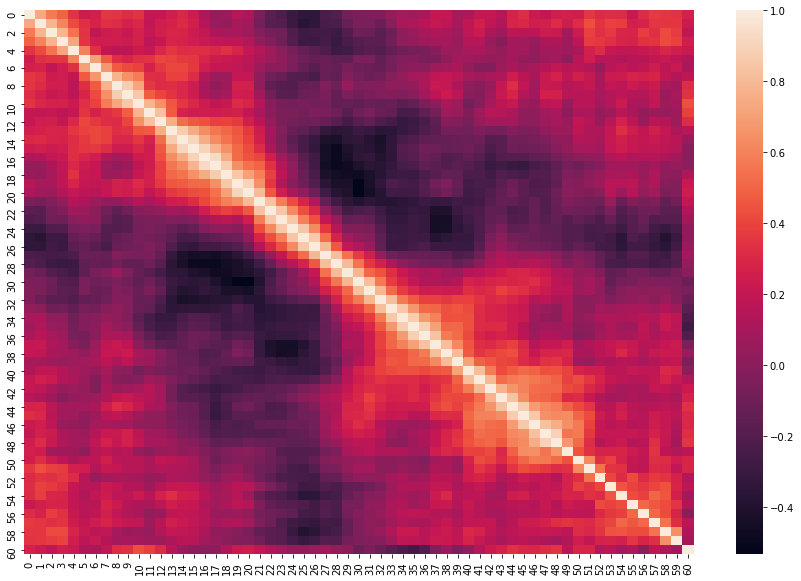

In [12]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(data.corr())

The diagonal white suggests that attributes that are next to each other are more correlated with each other. The dark violet patches also suggest some moderate negative correlation the further attributes are away from each other.

### Splitting the data

In [13]:
x = data.iloc[:,0:60]
y = data.iloc[:,60]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size=0.2, random_state=1)

### Data Modelling Without Scaling

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(xtrain, ytrain)
lr_pred = lr_model.predict(xtest)
lr_score = accuracy_score(ytest,lr_pred)
lr_score

0.8095238095238095

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)
dt_pred = dt_model.predict(xtest)
dt_score = accuracy_score(ytest,dt_pred)
dt_score

0.7380952380952381

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(xtrain, ytrain)
knn_pred = knn_model.predict(xtest)
knn_score = accuracy_score(ytest,knn_pred)
knn_score

0.7142857142857143

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(xtrain, ytrain)
gnb_pred = gnb_model.predict(xtest)
gnb_score = accuracy_score(ytest,gnb_pred)
gnb_score

0.5952380952380952

In [21]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(xtrain, ytrain)
svc_pred = gnb_model.predict(xtest)
svc_score = accuracy_score(ytest,svc_pred)
svc_score

0.5952380952380952

### Pipeline: Modelling with Scaled Data

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
scaled_LR=Pipeline([('scalar1',StandardScaler()), ('lr_classifier',LogisticRegression(random_state=0))])

In [24]:
scaled_DT=Pipeline([('scalar2',StandardScaler()),('dt_classifier',DecisionTreeClassifier())])

In [25]:
scaled_KNN=Pipeline([('scalar3',StandardScaler()),('knn_classifier',KNeighborsClassifier())])

In [26]:
scaled_GNB=Pipeline([('scalar4',StandardScaler()),('gnb_classifier',GaussianNB())])

In [27]:
scaled_SVM=Pipeline([('scalar5',StandardScaler()),('svm_classifier',SVC(gamma='auto'))])

In [28]:
pipelines = [scaled_LR, scaled_DT, scaled_KNN, scaled_GNB, scaled_SVM]

In [29]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [30]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: "KNN", 3:'GNB', 4:'SVM'}

In [31]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(xtrain, ytrain)

In [32]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i], model.score(xtest,ytest)))

Logistic Regression Test Accuracy: 0.7142857142857143
Decision Tree Test Accuracy: 0.7380952380952381
KNN Test Accuracy: 0.6904761904761905
GNB Test Accuracy: 0.5952380952380952
SVM Test Accuracy: 0.7380952380952381


### Using KFolds

In [33]:
# Pipeline for standardized test harness

pipelines=[]
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled-DT', Pipeline([('Scaler', StandardScaler()), ('DT',  DecisionTreeClassifier())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-GNB', Pipeline([('Scaler', StandardScaler()), ('GNB', GaussianNB())])))
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [34]:
# Evaluate the test harness (Standardized)
from sklearn.model_selection import KFold,cross_val_score
results = []
names = []
num_folds = 10

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results  = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print('%s: %f' % (name, cv_results.mean()))

Scaled-LR: 0.802941
Scaled-DT: 0.740809
Scaled-KNN: 0.814338
Scaled-GNB: 0.707721
Scaled-SVM: 0.862132


As we can see, LR, KNN and SVM performs better!

### Hypertuning

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#### LR

In [36]:
model = LogisticRegression()
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ["l1", "l2", "elasticnet"]
c = [100,10,1,0.01,0.1,0.001]

kfoldcv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state = 1)
grid = dict(solver =  solver, penalty = penalty, C = c)
grid_cv = GridSearchCV(estimator = model,param_grid = grid, cv = kfoldcv, scoring = "accuracy")

In [37]:
res = grid_cv.fit(xtrain,ytrain)

In [38]:
print(res.best_score_)

0.79125


In [39]:
print(res.best_params_)

{'C': 100, 'penalty': 'l2', 'solver': 'sag'}


#### KNN

In [40]:
model=KNeighborsClassifier()
n_neighbors=range(1,31)
metric=["euclidean","manhattan","minkowski"]
weights=['uniform','distance']
grid={"n_neighbors":n_neighbors,"metric":metric,"weights":weights}
grid_cv=GridSearchCV(estimator=model, param_grid=grid, cv=kfoldcv, scoring="accuracy", n_jobs=1)
res=grid_cv.fit(xtrain,ytrain)


In [41]:
print(res.best_score_)

0.8441176470588235


In [42]:
print(res.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


#### SVM

In [44]:
model=SVC()

#paramters
kernel=['linear', 'poly', 'rbf', 'sigmoid']
C=[100,50,10,1,0.1,0.01]
gamma=['scale']

#grid
grid={"kernel":kernel,"C":C,"gamma":gamma}
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfoldcv,scoring='accuracy',n_jobs=1)
res=grid_cv.fit(xtrain,ytrain)

In [45]:
print(res.best_score_)

0.8561764705882352


In [46]:
print(res.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
